In [10]:
import numpy as np
import math
import time
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.colors import TwoSlopeNorm
from scipy import sparse

import netket as nk
import os
os.environ["JAX_PLATFORM_NAME"] = "cpu"
import json

PATH = os.getcwd()

H = sparse.load_npz(PATH + '/n16hamiltonian.npz')

In [11]:
numEnergies = 100

energies, states = sparse.linalg.eigs(H.asfptype(), k=numEnergies, which='SR')

energies = np.real(energies)
states = np.real(states)

print(states)

[[-7.51584535e-04 -3.67523167e-09  3.98154982e-04 ... -1.08682784e-07
   1.20174717e-10 -1.20649197e-08]
 [-1.34470919e-03 -4.70798289e-09  1.27140328e-03 ...  2.04910897e-03
   6.63593470e-04 -7.57505652e-04]
 [ 8.72667530e-04 -3.07696428e-05 -1.28642388e-03 ... -1.15118723e-03
  -2.14556954e-03 -2.30323500e-03]
 ...
 [ 8.72664328e-04  3.07743030e-05 -1.28642190e-03 ...  1.15112495e-03
   2.14575604e-03  2.30329973e-03]
 [-1.34471583e-03 -2.20923324e-09  1.27138454e-03 ... -2.04904331e-03
  -6.63670478e-04  7.57530797e-04]
 [-7.51583546e-04 -1.17865673e-08  3.98190925e-04 ...  6.98063403e-08
   1.12878089e-08 -5.89423550e-08]]


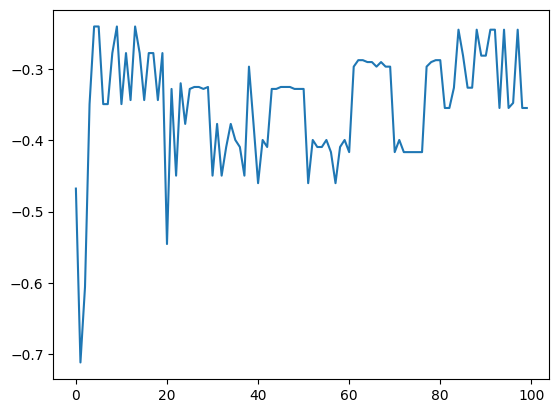

In [12]:
csrH = H.tocsr()

def spinCorrelation(states,n):
    spin_corr = 0
    for i in range(0,len(states)):
        spin_corr += (states[i][n]**2)*csrH[i,i]

    spin_corr /= 32
    return spin_corr

spinCorrelations = []

for i in range(0,numEnergies):
    spinCorrelations.append(spinCorrelation(states,i))

plt.plot(np.array(spinCorrelations))